# Investigating the $\alpha%$ decay using the split-step algorithm

A simple model for $\alpha$ decay involves a particle in a square well incident on a Coulomb barrier with an energy such that it must tunnel through this barrier.

A gaussian wavepacket can be used in order to model the behaviour of a particle and, to avoid the periodic boundary conditions, a near-hard wall is set up near x = 0.

For an explaination of the split-step method see the [previous notebook](split_step_schrodinger.ipynb)

## Setting up potential and wavepacket functions

Starting with a Gaussian wavepacket incident on the potential barrier which is a Coulomb barrier which starts a third of the way along the x-domain.

In [1]:
import numpy as np

import pycav.pde as pde
import pycav.display as display
import matplotlib.pyplot as plt
import matplotlib.animation as anim

def oneD_gaussian(x,mean,std,k0):
    return np.exp(-((x-mean)**2)/(4*std**2)+ 1j*x*k0)/(2*np.pi*std**2)**0.25

def V(x):
    V_x = np.zeros_like(x)
    mid = int(len(x)/3)
    V_x[mid:] = 250/(x[mid:]-x[0])
    V_x[:50] = 10**2
    return V_x

We must define the spatial domain as well as the time step size and number of steps. Then the initial wavefunction is passed to the split step algorithm.

In [2]:
N_x = 2**11
dx = 0.1
x = dx * (np.arange(N_x) - 0.5 * N_x)

dt = 0.01
N_t = 8000

p0 = 2.5
d = np.sqrt(N_t*dt/2.)

psi_0 = oneD_gaussian(x,x[0]+5*d,d,p0)

psi_x,psi_k,k = pde.split_step_schrodinger(psi_0, dx, dt, V, N_t, x_0 = x[0])

## Energy of $\alpha$ particle and max potential barrier height

The ratio of the particle energy within the well compared to the max height of the Coulomb barrier. As long as this is less than unity then the decay is classically forbidden and must proceed via tunneling.

In [3]:
E_particle = p0**2/2
E_barrier  = V(x)[50:].max()
print(E_particle/E_barrier)

0.8525


The time evolution can then be animated showing the expected behaviour. The momentum space wavefunction can also be visualised (here shown in the second subplot).

In [4]:
real_psi  = np.real(psi_x)
imag_psi  = np.imag(psi_x)
absl_psi  = np.absolute(psi_x)
abs_psik  = np.absolute(psi_k)

fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(211)
line1_R = ax1.plot(x,real_psi[:,0],'b')[0]
line1_I = ax1.plot(x,imag_psi[:,0],'r')[0]
line1_A = ax1.plot(x,absl_psi[:,0],'k')[0]
line_V = ax1.plot(x,0.12*(V(x)-p0**2/2),'k',alpha=0.5)[0]
ax1.set_ylim((real_psi.min(),real_psi.max()))
ax1.set_xlim((x.min(),x.max()))

ax2 = plt.subplot(212)
line2_A = ax2.plot(k,abs_psik[:,1],'k')[0]
ax2.set_ylim((abs_psik.min(),abs_psik.max()))
ax2.set_xlim((-10,10))

def nextframe(arg):
    line1_R.set_data(x,real_psi[:,10*arg])
    line1_I.set_data(x,imag_psi[:,10*arg])
    line1_A.set_data(x,absl_psi[:,10*arg])
    line2_A.set_data(k,abs_psik[:,10*arg])
    
animate = anim.FuncAnimation(fig, nextframe, frames = int(N_t/10), interval = 50, repeat = False)
animate = display.create_animation(animate,temp = True)
display.display_animation(animate)

### Probability of decay

By integrating the probability density either side of the point of the Coulomb potential where the potential is equal to the energy of particle in the well, the probability of decay as a function of time can be visualised

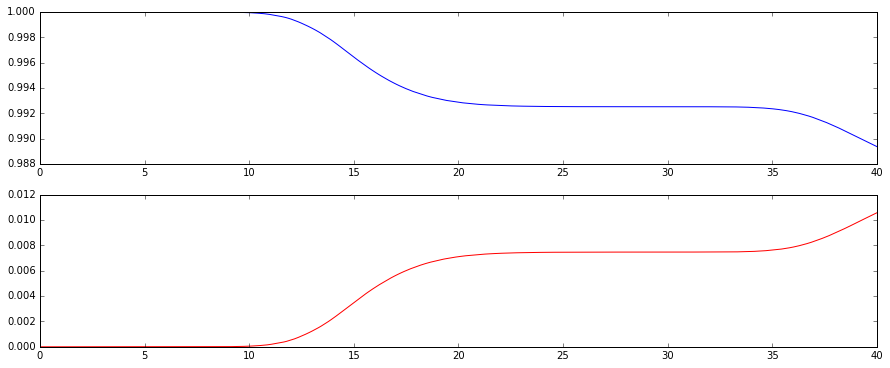

In [14]:
b_x = np.where(V(x) > E_particle)[0][-1]
P_undecayed = [np.trapz(absl_psi[:b_x,n]**2,x[:b_x]) for n in np.arange(N_t)] 
P_decayed   = [np.trapz(absl_psi[b_x:,n]**2,x[b_x:]) for n in np.arange(N_t)] 

t = np.arange(N_t)/200
%matplotlib inline
fig1 = plt.figure(figsize = (15,6));
ax = fig1.add_subplot(211);
ax.plot(t,P_undecayed,'b');
ax = fig1.add_subplot(212);
ax.plot(t,P_decayed,'r');
